Generation 1: Best = 11011, Fitness = 729
Generation 2: Best = 11011, Fitness = 729
Generation 3: Best = 11111, Fitness = 961


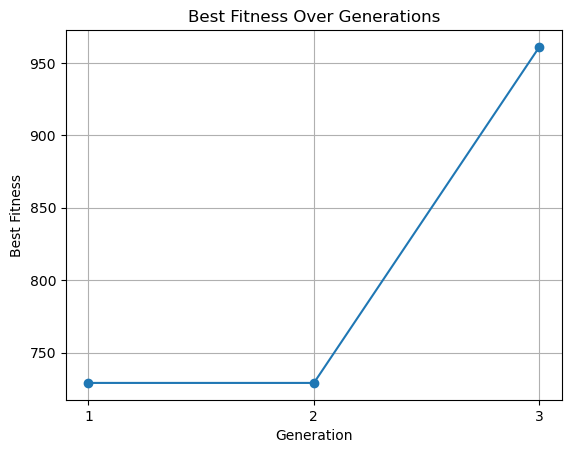

In [1]:
import random
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
random.seed(42)

# Step 1: Initialize population
def initialize_population(size, num_bits):
    return [''.join(random.choice('01') for _ in range(num_bits)) for _ in range(size)]

# Step 2: Calculate fitness
def calculate_fitness(population):
    fitness = [int(individual, 2) ** 2 for individual in population]
    return fitness

# Step 3: Roulette Wheel Selection
def roulette_wheel_selection(population, fitness):
    total_fitness = sum(fitness)
    probabilities = [f / total_fitness for f in fitness]
    selected = random.choices(population, weights=probabilities, k=2)
    return selected

# Step 4: Single-Point Crossover
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Step 5: Mutation
def mutate(individual, mutation_rate):
    mutated = ''.join(
        bit if random.random() > mutation_rate else str(1 - int(bit))
        for bit in individual
    )
    return mutated

# Step 6: Genetic Algorithm
def genetic_algorithm(pop_size, num_bits, mutation_rate, num_generations):
    population = initialize_population(pop_size, num_bits)
    best_fitness_values = []

    for generation in range(num_generations):
        fitness = calculate_fitness(population)
        next_population = []
        for _ in range(pop_size // 2):
            # Selection
            parent1, parent2 = roulette_wheel_selection(population, fitness)
            # Crossover
            child1, child2 = crossover(parent1, parent2)
            # Mutation
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_population.extend([child1, child2])

        # Update population
        population = next_population
        best_individual = max(population, key=lambda ind: int(ind, 2) ** 2)
        best_fitness = int(best_individual, 2) ** 2
        best_fitness_values.append(best_fitness)
        print(f"Generation {generation + 1}: Best = {best_individual}, Fitness = {best_fitness}")

    # Plotting the best fitness values over generations
    plt.plot(range(1, num_generations + 1), best_fitness_values, marker='o')
    plt.title('Best Fitness Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.xticks(range(1, num_generations + 1))  # Set x-axis ticks to integer values
    plt.show()

    return population

# Run the Genetic Algorithm
population_size = 4
bit_str_len = 5
rate_of_mutation = 0.1
max_generations = 3

final_population = genetic_algorithm(population_size, bit_str_len, rate_of_mutation, max_generations)